# **Download-Process-Display the Data**

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# ((num_samples, 3, 32, 32).
# (num_samples,). 

# shape attribute of an image matrix gives the dimensions
nsamples, row,col,channels = x_train.shape

print( "Size of x_train data" , x_train.shape)


Size of x_train data (50000, 32, 32, 3)


The quality is very bad!

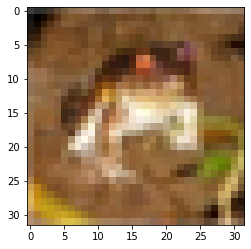

In [ ]:
#plt.axis("off")
#plt.imshow(x_train[1])
plt.imshow(x_train[0,:,:,:])
#plt.imshow(x_train[1,:,:,2])
#plt.imshow(x_train[1,:,:,3])

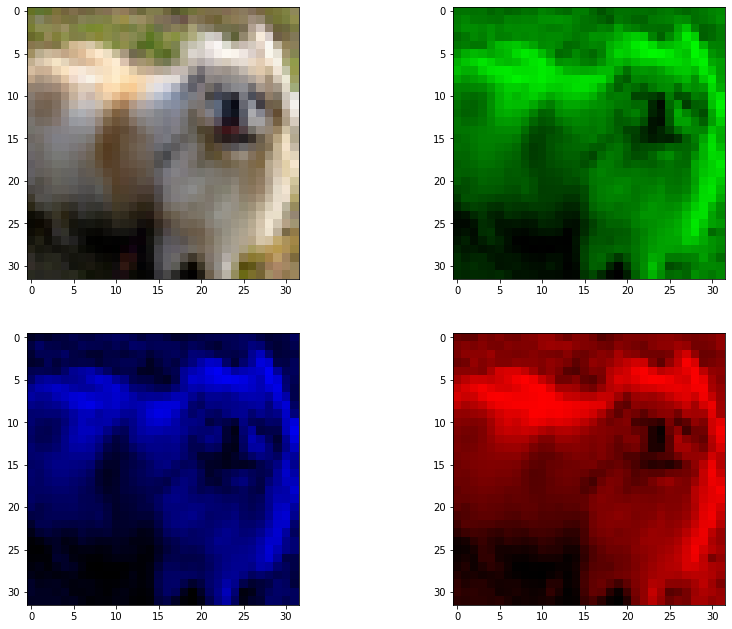

In [ ]:
temp0 = np.zeros((row,col,channels),np.uint8)
temp1 = np.zeros((row,col,channels),np.uint8)
temp2 = np.zeros((row,col,channels),np.uint8)

temp0[:,:,0] = x_train[40,:,:,0]
temp1[:,:,1] = x_train[40,:,:,1]
temp2[:,:,2] = x_train[40,:,:,2]

# displaying the images
#plt.imshow(temp1)
fig, axs = plt.subplots(2, 2, figsize=(14, 11))

axs[0,0].imshow(x_train[40])
axs[0,1].imshow(temp1)
axs[1,0].imshow(temp2)
axs[1,1].imshow(temp0)

plt.savefig('cifar10_dog.png')

In [ ]:
from sklearn.preprocessing import LabelBinarizer

trainX = x_train.astype("float") / 255.0
testX = x_test.astype("float") / 255.0
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(y_train)
testY = lb.transform(y_test)
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

# NO HACE FALTA, ES PARA CLASIFICACION

In [ ]:
# (50000, 32, 32, 3)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# (0000, 784)
x_train_d = x_train.reshape(   (len(x_train), np.prod(x_train.shape[1:])  )  ) #50000, 32*32*3=3072
x_test_d = x_test.reshape(     (len(x_test), np.prod(x_test.shape[1:])  )    ) #10000, 3072

n_train = 50000
n_test = 10000
n_full = 60000

x_full = np.concatenate( ( x_train_d, x_test_d ) , axis=0)  # (60000, 3072)
y_full = np.concatenate( ( y_train, y_test ) , axis=0)  # (60000,)
y_full = y_full.reshape(60000,)

print( "Size of x_full data" , x_full.shape)

Size of x_full data (60000, 3072)


In [ ]:
x_full_c = np.concatenate( ( x_train, x_test ) , axis=0)

print( "Size of x_full_c data" , x_full_c.shape) # (60000, 32, 32, 3)

Size of x_full_c data (60000, 32, 32, 3)


Utilitzar x_full, x_full_c



---



In [ ]:
label_dictionnary = {0:'airplane', 1:'automobile', 2:'bird', 
                     3:'cat', 4:'deer', 5:'dog', 6:'frog', 
                     7:'horse', 8:'ship', 9:'truck' }

noms = list( label_dictionnary.values() )
def true_label(x):
    return label_dictionnary[x]

In [ ]:

semilla = 1997
np.random.seed(seed= semilla)
muestra = np.random.randint(0, high= 60000, size=10000, dtype='int')  

# https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html

In [ ]:
#np.random.choice(data.ravel(),5,replace=False)
x_rfull = x_full[muestra]
y_rfull = y_full[muestra]

Target_name = np.vectorize(true_label)(y_full)
Target_namer = np.vectorize(true_label)(y_rfull)
Target_name_test = np.vectorize(true_label)(y_test)


.



---



# **Graficos de visualizacion para presentacion**

In [ ]:
def grafico(space, fitxer=''):

  fig, (ax1, ax2) = plt.subplots( nrows=1,ncols=2,figsize=(18, 10) )

  ax1.scatter( space[:,0], space[:,1], c= y_rfull, cmap=plt.cm.get_cmap('jet', 10), s=2 ,alpha=0.3 ) 
  ax1.axis('off')

  ax2.scatter( space[:,0], space[:,1],  c= "black", s=2 ,alpha=0.3 ) 
  ax2.axis('off')

  fig.savefig( fitxer )
  plt.show()

# TSNE

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca_50d = PCA(n_components= 50)
pca_50d.fit_transform(x_rfull)

#print( my_model.explained_variance_ )
#print( my_model.explained_variance_ratio_ )
print( pca_50d.explained_variance_ratio_.cumsum() )

[0.28907058 0.3993078  0.4677549  0.50585735 0.54186124 0.5700779
 0.5971711  0.6190786  0.6399113  0.6547578  0.6676288  0.67825
 0.6887103  0.69889504 0.7081269  0.7162675  0.72359824 0.7308428
 0.73780894 0.7444112  0.75034267 0.7562676  0.76144123 0.76649475
 0.7712379  0.7759657  0.7805941  0.7849864  0.78900605 0.79298556
 0.79667974 0.80014855 0.8033569  0.8064701  0.8094926  0.81249404
 0.815132   0.8177278  0.82026464 0.8227625  0.82517946 0.8275289
 0.82984066 0.8321059  0.83427256 0.8363057  0.8382655  0.8401494
 0.8419896  0.84382164]


In [ ]:
import time
from sklearn.manifold import TSNE

tsne1 = TSNE( n_components= 2, perplexity= 25.0, learning_rate= 10.0, n_iter=5000, random_state= semilla, n_iter_without_progress=100 )
tsne_results = tsne1.fit_transform(x_rfull)

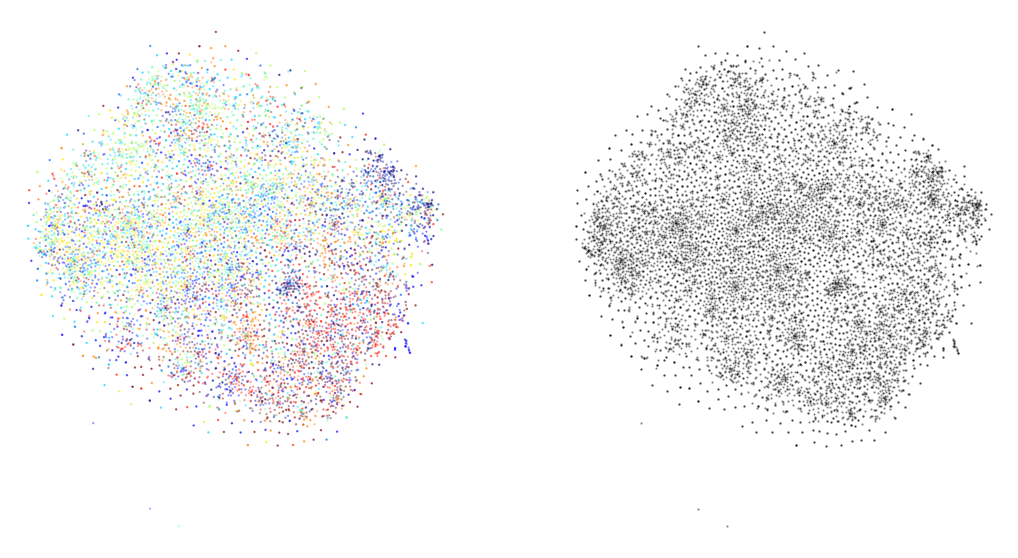

In [ ]:
grafico(tsne_results, fitxer='tsne_mnist')

# PCA


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

#x_train_d_scaled = scale(x_train_d, axis=0)
# falta escalar los datos 

pcaf_2d = PCA(n_components=2)
pca_2d = pcaf_2d.fit_transform(x_full)

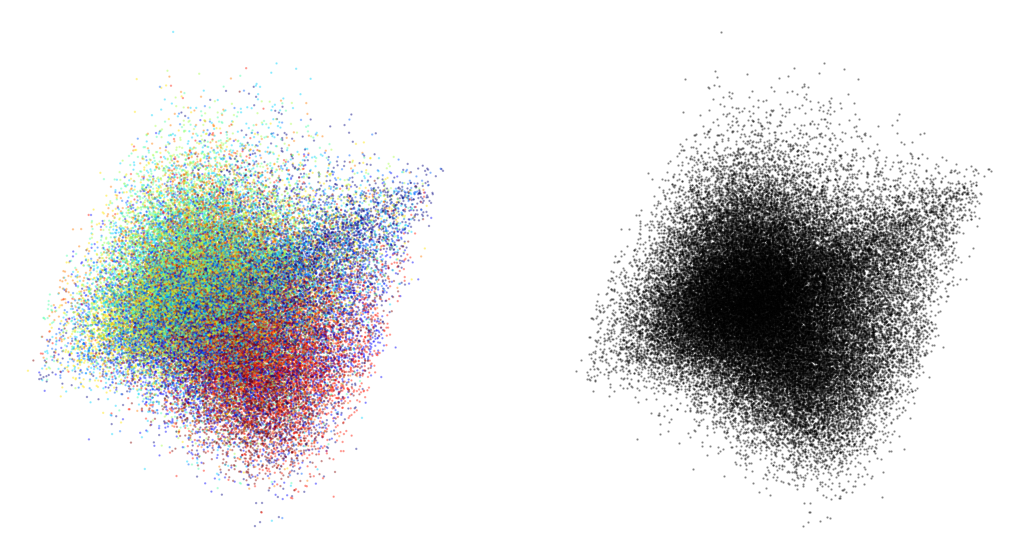

In [ ]:
grafico(pca_2d, fitxer='pca_cifar')

# UMAP

In [ ]:
import umap

fit = umap.UMAP( n_neighbors=15, min_dist=0, n_components=2, metric="euclidean", random_state=semilla)
umap_2d = fit.fit_transform(x_rfull)

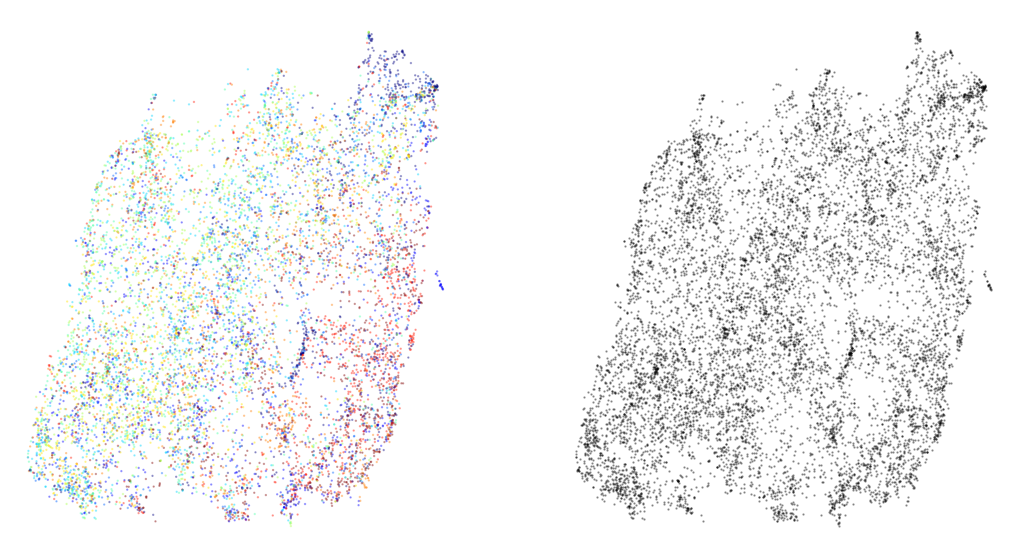

In [ ]:
grafico(umap_2d, fitxer='umap_cifar')

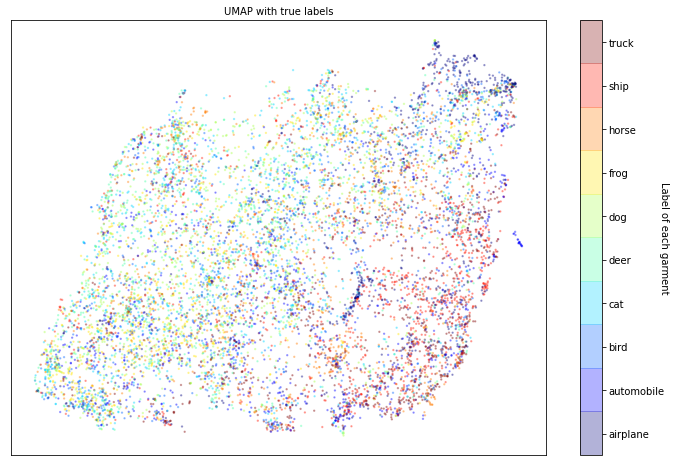

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter( umap_2d[:,0], umap_2d[:,1], c= y_rfull, cmap=plt.cm.get_cmap('jet', 10), s=2, alpha=0.3,label=Target_namer) 
plt.setp(ax, xticks = [], yticks = [])
ax.set_title('UMAP with true labels', fontsize=10)
#plt.title(titol, fontsize=18)

cbar = plt.colorbar(boundaries = np.arange(11)-0.5, cmap=plt.cm.get_cmap('jet', 10))
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(noms)
cbar.ax.set_ylabel('Label of each garment', rotation=270, fontsize=10)

fig.savefig( "umap_cifar" )
plt.show()

No se puede distinguir nada



---



# **Clustering**

In [ ]:
import sklearn.cluster as cluster
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
!pip install coclust
from coclust.evaluation.external import accuracy

  Created wheel for coclust: filename=coclust-0.2.1-cp36-none-any.whl size=29872 sha256=e0530eaba3ebd3c0a4706a494e0676965f59a2140d7a9aa03bfbc64664ba692c
  Stored in directory: /root/.cache/pip/wheels/cd/d7/68/df601d0b5f8b934cf890dc626c2271df381fb0c3e910b0a34e
Successfully built coclust


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [ ]:
kmeans_labels_original_full = cluster.KMeans(n_clusters=10, n_init=10, random_state=1997).fit_predict( x_full ) # ya te da las labels / fit_predict() vs fit()

In [ ]:
kmeans_labels_original_full

array([3, 8, 0, ..., 6, 8, 1], dtype=int32)

In [ ]:
#from sklearn.metrics import normalized_mutual_info_score, adjusted_mutual_info_score, adjusted_rand_score

print( 'NMI:', normalized_mutual_info_score(y_full, kmeans_labels_original_full) )
print( 'AMI:', adjusted_mutual_info_score(y_full, kmeans_labels_original_full) )
print( 'ARI:', adjusted_rand_score(y_full, kmeans_labels_original_full) )
print( 'ACC:', accuracy(y_full, kmeans_labels_original_full) )
#print( 'SIL:', silhouette_score(x_full, kmeans_labels_original_full)  )

NMI: 0.07930588560141266
AMI: 0.079033826733154
ARI: 0.04181206917014811
ACC: 0.20611666666666667


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


# PCA + HDBSCAN

In [ ]:
!pip install hdbscan
import hdbscan

     |████████████████████████████████| 4.7MB 3.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2305903 sha256=2192a93e054b9457b3b5642d6512d523a9bccc1bfa77755819f2c1cc9e2cf0a4
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca_50d = PCA(n_components=50).fit_transform(x_full)

hdlabels = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=500).fit(pca_50d).labels_ # cluster_selection_epsilon


In [ ]:
unique_elements, counts_elements = np.unique( hdlabels, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   -1]
 [60000]]


In [ ]:
clustered = hdlabels >= 0

print( 'No grey observations' )
print( 'NMI:', normalized_mutual_info_score(y_full[clustered], hdlabels[clustered]) )
print( 'ARI:', adjusted_rand_score(y_full[clustered], hdlabels[clustered]) )
print( 'ACC:', accuracy(y_full[clustered], hdlabels[clustered]) )

No grey observations


NameError: ignored

# tsne2 + kmeans

In [ ]:
kmeans_labels_tsne = cluster.KMeans(n_clusters=10, n_init=10, random_state=1997).fit_predict( tsne_results )

In [ ]:
print( 'NMI:', normalized_mutual_info_score(y_full, kmeans_labels_tsne) )
print( 'AMI:', adjusted_mutual_info_score(y_full, kmeans_labels_tsne) )
print( 'ARI:', adjusted_rand_score(y_full, kmeans_labels_tsne) )
print( 'ACC:', accuracy(y_full, kmeans_labels_tsne) )

# umap2 + kmeans

In [ ]:
kmeans_labels_umap = cluster.KMeans(n_clusters=10, n_init=10, random_state=1997).fit_predict( umap_2d )

In [ ]:
print( 'NMI:', normalized_mutual_info_score(y_full, kmeans_labels_umap) )
print( 'AMI:', adjusted_mutual_info_score(y_full, kmeans_labels_umap) )
print( 'ARI:', adjusted_rand_score(y_full, kmeans_labels_umap) )
print( 'ACC:', accuracy(y_full, kmeans_labels_umap). )

# umap2 + hdbscan

In [ ]:
hdlabels_umap = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=500).fit(umap_2d).labels_

In [ ]:
unique_elements, counts_elements = np.unique( hdlabels_umap, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

In [ ]:
clustered = hdlabels_umap >= 0

print( 'No grey observations' )
print( 'NMI:', normalized_mutual_info_score(y_full[clustered], hdlabels_umap[clustered]) )
print( 'ARI:', adjusted_rand_score(y_full[clustered], hdlabels_umap[clustered]) )
print( 'ACC:', accuracy(y_full[clustered], hdlabels_umap[clustered]) )



---



# **Convolutional autoencoder 2D** 


# Visualization

# **Convolutional autoencoder 10D** 

# Clustering